<a href="https://colab.research.google.com/github/Nataliya2401/DS_11/blob/main/hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv')

In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.shape

(550, 7)

In [ ]:
# Про скільки книг зберігає дані датасет?
df1 = df.groupby(['Name', 'Author'])
print('Про скільки книг зберігає дані датасет? Відповідь: ', len(df1))

Про скільки книг зберігає дані датасет? Відповідь:  351


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [ ]:
# виведіть кількість пропусків (na) у кожному зі стовпців
empty_count = df.isna().sum()
empty_count

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски?   Відповідь:   ні

In [ ]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
unique_genre = df['genre'].unique()
unique_genre

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?    Відповідь: Non Fiction, Fiction

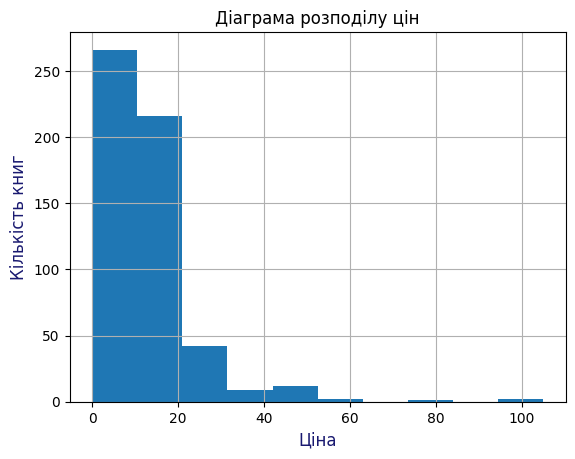

In [ ]:
#  подивіться на розподіл цін: побудуйте діаграму
plt.title('Діаграма розподілу цін')
plt.xlabel('Ціна', fontsize='large', color='midnightblue')
plt.ylabel('Кількість книг', fontsize='large', color='midnightblue')
df['price'].hist()
plt.show()


In [ ]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max_price, min_price, mean_price, median_price = df['price'].agg(['max', 'min', 'mean', 'median'])
print('Максимальна ціна? Відповідь:  ', max_price)

Максимальна ціна? Відповідь:   105.0


In [ ]:
print('Мінімальна ціна? Відповідь:  ', min_price)

Мінімальна ціна? Відповідь:   0.0


In [ ]:
print('Середня ціна? Відповідь:  ', mean_price)

Середня ціна? Відповідь:   13.1


In [ ]:
print('Медіанна ціна? Відповідь:  ', median_price)

Медіанна ціна? Відповідь:   11.0


In [ ]:
max_rate = df['user_rating'].max()
print('Який рейтинг у датасеті найвищий? Відповідь: ', max_rate)

Який рейтинг у датасеті найвищий? Відповідь:  4.9


In [ ]:
count_books_max_rate = len(df.query('user_rating ==user_rating.max()').groupby('name'))
# або df.query('user_rating ==user_rating.max()').groupby('name').ngroups
print('Скільки книг мають такий рейтинг? Відповідь:  ', count_books_max_rate)

Скільки книг мають такий рейтинг? Відповідь:   28


In [ ]:
# Яка книга має найбільше відгуків? Відповідь:
book_with_max_reviews = df.query('reviews == reviews.max()')['name']

print('Яка книга має найбільше відгуків? Відповідь: ', book_with_max_reviews.values[0])

Яка книга має найбільше відгуків? Відповідь:  Where the Crawdads Sing


In [ ]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча
df2 = df.query('year == 2015')

In [ ]:
book_2015_max_price = df2.query('price == price.max()')
print('З книг Топ-50 у 2015 році, яка книга найдорожча? Відповідь: ', '\n', book_2015_max_price['name'].values[0])

З книг Топ-50 у 2015 році, яка книга найдорожча? Відповідь:  
 Publication Manual of the American Psychological Association, 6th Edition


In [ ]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році :
number_fiction_2010 = df.query('year == 2010 and genre == "Fiction"')['name'].count()
print('Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь :', number_fiction_2010)

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь : 20


In [ ]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
number_4_9 = df.query('user_rating == 4.9 and (year == 2010 or year == 2011)')['name'].count()
print('Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: ', number_4_9)

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь:  1


In [ ]:
# відсортувати за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і  дешевше за 8 доларів
df_sort = df.query('year == 2015 and price < 8').sort_values('price')
df_sort

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [ ]:
print('Яка книга остання у відсортованому списку? Відповідь:  ', df_sort.tail(1).name.values[0])

Яка книга остання у відсортованому списку? Відповідь:   Old School (Diary of a Wimpy Kid #10)


### Агрегування даних та з'єднання таблиць

In [ ]:
# подивимося на максимальну та мінімальну ціни для кожного з жанрів
data = df.groupby(['genre'])['price'].agg(['min', 'max'])
data

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


*  Максимальна ціна для жанру Fiction: Відповідь: 82;
*  Мінімальна ціна для жанру Fiction: Відповідь: 0;
*  Максимальна ціна для жанру Non Fiction: Відповідь: 105
*  Мінімальна ціна для жанру Non Fiction: Відповідь: 0.

In [ ]:
# створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
df_authors = df.groupby(['author'])['name'].agg(['count']).reset_index()
df_authors

,author,count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [ ]:
print('Якої розмірності вийшла таблиця? Відповідь:  ', df_authors.shape)

Якої розмірності вийшла таблиця? Відповідь:   (248, 2)


In [ ]:
print('Який автор має найбільше книг? Відповідь:  ', df_authors.query('count == count.max()')['author'].values[0])

Який автор має найбільше книг? Відповідь:   Jeff Kinney


In [ ]:
print('Скільки книг цього автора? Відповідь: ', df_authors.query('count == count.max()')['count'].values[0])

Скільки книг цього автора? Відповідь:  12


In [ ]:
# створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
df_authors_rate = df.groupby(['author'])['user_rating'].agg(['mean']).reset_index()
df_authors_rate

,author,mean
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [ ]:
print('Автор з мінімальним середнім рейтингом? Відповідь: ')
print(df_authors_rate.query('mean == mean.min()')['author'].values[0])

Автор з мінімальним середнім рейтингом? Відповідь: 
Donna Tartt


In [ ]:
print('Який у цього автора середній рейтинг? Відповідь: ', df_authors_rate.query('author == "Donna Tartt"')['mean'].values[0])

Який у цього автора середній рейтинг? Відповідь:  3.9


In [ ]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
authors = pd.concat([df_authors,df_authors_rate['mean']], axis=1)
authors


,author,count,mean
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


In [ ]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом
authors.sort_values(['count', 'mean'], inplace=True)
authors

,author,count,mean
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


In [ ]:
print('Який автор перший у списку? Відповідь: ', '\n', authors.head(1))

Який автор перший у списку? Відповідь:  
              author  count  mean
171  Muriel Barbery      1   4.0


In [ ]:
rating_count = df.groupby('user_rating').count().reset_index()
rating_count['count'] = rating_count['name']
rating_count[['user_rating','count']]

,user_rating,count
0,3.3,1
1,3.6,1
2,3.8,2
3,3.9,3
4,4.0,14
5,4.1,6
6,4.2,8
7,4.3,25
8,4.4,38
9,4.5,60


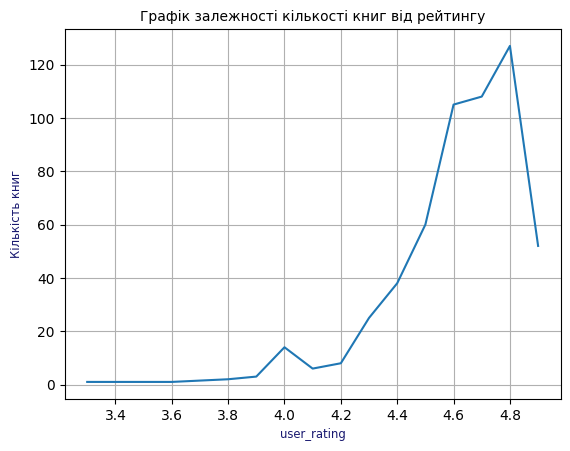

In [ ]:

plt.plot(rating_count['user_rating'].values, rating_count['count'].values)
plt.xlabel('user_rating', fontsize='small', color='midnightblue')
plt.ylabel('Кількість книг', fontsize='small', color='midnightblue')
plt.title('Графік залежності кількості книг від рейтингу', fontsize=10)
plt.grid()
plt.show()

In [ ]:
genre = df.groupby('genre').size()
genre

genre
Fiction        240
Non Fiction    310
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

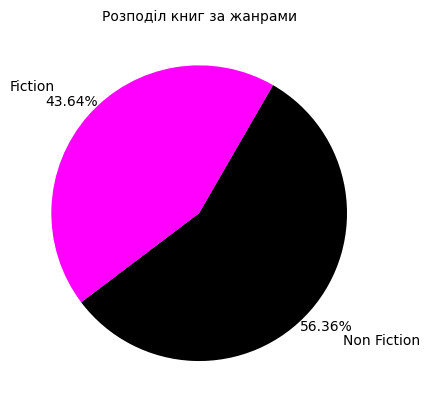

In [ ]:
plt.title('Розподіл книг за жанрами', fontsize=10)
plt.pie(df.groupby('genre').size(),
        explode=None,
        labels=df.groupby('genre').size().index,
        colors=['magenta', 'black'],
        autopct="%.2f%%",
        pctdistance=1.15,
        labeldistance=1.3,
        startangle=60,
        shadow=False)
plt.show

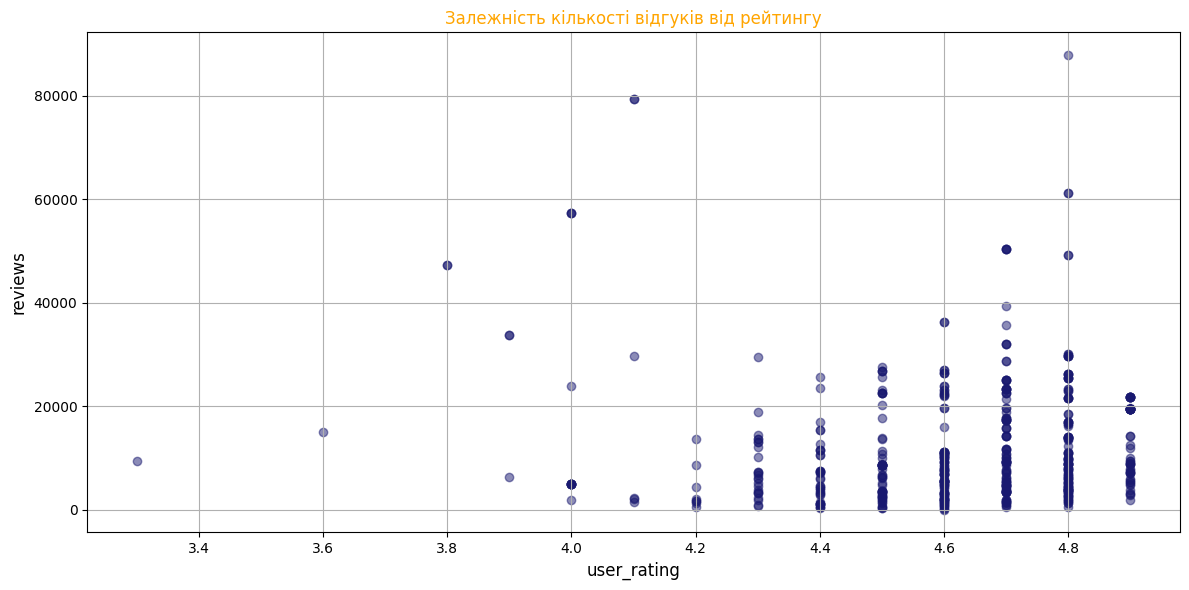

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Залежність кількості відгуків від рейтингу', fontsize=12, color='orange')
plt.scatter(df['user_rating'], df['reviews'], alpha=0.5, color='midnightblue')
plt.xlabel('user_rating', fontsize=12)
plt.ylabel('reviews', fontsize=12)

plt.grid()
plt.tight_layout()
plt.show()